# Imports

In [1]:
from utils import test_model
from datamodule import VLASSLoader
import torch
from models.vit import ViT
from models.cnn import CNN, ResNet

In [5]:
# https://docs.pytorch.org/vision/0.21/models.html
import timm
print(timm.list_models('*swin*'))

['hiera_base_abswin_256', 'hiera_small_abswin_256', 'swin_base_patch4_window7_224', 'swin_base_patch4_window12_384', 'swin_large_patch4_window7_224', 'swin_large_patch4_window12_384', 'swin_s3_base_224', 'swin_s3_small_224', 'swin_s3_tiny_224', 'swin_small_patch4_window7_224', 'swin_tiny_patch4_window7_224', 'swinv2_base_window8_256', 'swinv2_base_window12_192', 'swinv2_base_window12to16_192to256', 'swinv2_base_window12to24_192to384', 'swinv2_base_window16_256', 'swinv2_cr_base_224', 'swinv2_cr_base_384', 'swinv2_cr_base_ns_224', 'swinv2_cr_giant_224', 'swinv2_cr_giant_384', 'swinv2_cr_huge_224', 'swinv2_cr_huge_384', 'swinv2_cr_large_224', 'swinv2_cr_large_384', 'swinv2_cr_small_224', 'swinv2_cr_small_384', 'swinv2_cr_small_ns_224', 'swinv2_cr_small_ns_256', 'swinv2_cr_tiny_224', 'swinv2_cr_tiny_384', 'swinv2_cr_tiny_ns_224', 'swinv2_large_window12_192', 'swinv2_large_window12to16_192to256', 'swinv2_large_window12to24_192to384', 'swinv2_small_window8_256', 'swinv2_small_window16_256',

# Load

In [2]:
loader = VLASSLoader(root='./data')

loader.setup('fit')
val_dataloader = loader.val_dataloader()

61351 images, each of size 64 x 64 pixels.
There are 61351 corresponding labels - one category for each image.
61351 images, each of size 64 x 64 pixels.
There are 61351 corresponding labels - one category for each image.
Val size: 12271


# CNN

## No augmentation

In [7]:
model = CNN.load_from_checkpoint(
    'outputs/cnn/lightning_logs/version_7/checkpoints/epoch=6-step=5362.ckpt'
).cpu()
result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]:.4f}, F1 = {result["f1"]:.4f}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [00:10<00:00, 18.78it/s]


Accuracy = 0.8385962041884817, F1 = 0.7548070171650243
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      2622
           1       0.94      0.95      0.94      5162
           2       0.78      0.81      0.79      3311
           3       0.46      0.40      0.43      1129

    accuracy                           0.84     12224
   macro avg       0.76      0.75      0.75     12224
weighted avg       0.83      0.84      0.84     12224

Confusion Matrix:
 [[2235   13   84  290]
 [  23 4896  223   20]
 [ 129  293 2670  219]
 [ 211   28  440  450]]


## Augmented

In [17]:
model = CNN.load_from_checkpoint(
    'outputs/cnn/lightning_logs/version_12/checkpoints/epoch=9-step=7660.ckpt'
).cpu()
result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]:.4f}, F1 = {result["f1"]:.4f}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [00:11<00:00, 16.08it/s]

Accuracy = 0.8318, F1 = 0.6445
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86      2622
           1       0.92      0.96      0.94      5162
           2       0.73      0.83      0.78      3311
           3       0.00      0.00      0.00      1129

    accuracy                           0.83     12224
   macro avg       0.61      0.68      0.64     12224
weighted avg       0.76      0.83      0.79     12224

Confusion Matrix:
 [[2453   15  154    0]
 [  27 4977  158    0]
 [ 194  379 2738    0]
 [ 426   24  679    0]]


# ResNet

## Full-tuned, no augmentation

In [ ]:
model = ResNet.load_from_checkpoint(
    'outputs/resnet/lightning_logs/version_1/checkpoints/epoch=2-step=2298.ckpt'
).cpu()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]}, F1 = {result["f1"]}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

Accuracy = 0.8808082460732984, F1 = 0.8135616403993511
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      2622
           1       0.96      0.96      0.96      5162
           2       0.83      0.86      0.85      3311
           3       0.62      0.49      0.55      1129

    accuracy                           0.88     12224
   macro avg       0.82      0.81      0.81     12224
weighted avg       0.88      0.88      0.88     12224

Confusion Matrix:
 [[2417    6   56  143]
 [  11 4937  208    6]
 [  93  175 2855  188]
 [ 248    4  319  558]]


## Frozen, no augmentation

In [6]:
model = ResNet.load_from_checkpoint(
    'outputs/resnet/lightning_logs/version_3/checkpoints/epoch=9-step=7660.ckpt'
).cpu()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]}, F1 = {result["f1"]}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [00:18<00:00, 10.14it/s]

Accuracy = 0.7378108638743456, F1 = 0.6014379876685579
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      2622
           1       0.81      0.91      0.86      5162
           2       0.61      0.63      0.62      3311
           3       0.36      0.08      0.13      1129

    accuracy                           0.74     12224
   macro avg       0.64      0.61      0.60     12224
weighted avg       0.71      0.74      0.71     12224

Confusion Matrix:
 [[2179   81  294   68]
 [  90 4677  380   15]
 [ 248  910 2072   81]
 [ 328   81  629   91]]


## Full-tuned, augmented

In [ ]:
model = ResNet.load_from_checkpoint(
    'outputs/resnet/lightning_logs/version_5/checkpoints/epoch=7-step=6128.ckpt'
).cpu()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]}, F1 = {result["f1"]}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [00:49<00:00,  3.86it/s]


Accuracy = 0.9016688481675392, F1 = 0.8448609543790737
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      2622
           1       0.96      0.97      0.97      5162
           2       0.88      0.88      0.88      3311
           3       0.65      0.59      0.62      1129

    accuracy                           0.90     12224
   macro avg       0.85      0.84      0.84     12224
weighted avg       0.90      0.90      0.90     12224

Confusion Matrix:
 [[2409    2   38  173]
 [   9 5032  113    8]
 [  42  176 2916  177]
 [ 194   17  253  665]]


# MobileNet

In [3]:
model = ResNet.load_from_checkpoint(
    './outputs/mobilenet/lightning_logs/version_4795120/checkpoints/epoch=9-step=7660.ckpt'
).cuda()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]:.4f}, F1 = {result["f1"]:.4f}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [00:04<00:00, 46.62it/s]


Accuracy = 0.8855, F1 = 0.8189
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      2622
           1       0.95      0.97      0.96      5162
           2       0.84      0.88      0.85      3311
           3       0.65      0.49      0.56      1129

    accuracy                           0.89     12224
   macro avg       0.83      0.81      0.82     12224
weighted avg       0.88      0.89      0.88     12224

Confusion Matrix:
 [[2391    9   58  164]
 [  15 4982  161    4]
 [  63  222 2898  128]
 [ 206   18  352  553]]


# EfficientNet

In [4]:
model = ResNet.load_from_checkpoint(
    './outputs/efficientnet/lightning_logs/version_4795120/checkpoints/epoch=2-step=2298.ckpt'
).cuda()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]:.4f}, F1 = {result["f1"]:.4f}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [00:06<00:00, 29.80it/s]


Accuracy = 0.8337, F1 = 0.7485
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      2622
           1       0.93      0.92      0.93      5162
           2       0.73      0.84      0.78      3311
           3       0.53      0.34      0.42      1129

    accuracy                           0.83     12224
   macro avg       0.77      0.74      0.75     12224
weighted avg       0.83      0.83      0.83     12224

Confusion Matrix:
 [[2237   28  164  193]
 [  13 4774  369    6]
 [  88  283 2791  149]
 [ 201   24  515  389]]


# ViT

## Full-tuned, no augmentation

In [11]:
model = ViT.load_from_checkpoint(
    'outputs/vit/lightning_logs/version_2/checkpoints/epoch=2-step=2298.ckpt'
).cpu()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]:.4f}, F1 = {result["f1"]:.4f}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [00:48<00:00,  3.95it/s]

Accuracy = 0.9154, F1 = 0.8693
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      2622
           1       0.98      0.97      0.97      5162
           2       0.87      0.92      0.90      3311
           3       0.68      0.68      0.68      1129

    accuracy                           0.92     12224
   macro avg       0.87      0.87      0.87     12224
weighted avg       0.92      0.92      0.92     12224

Confusion Matrix:
 [[2364    9   46  203]
 [   0 5011  146    5]
 [  15  100 3049  147]
 [ 110    7  246  766]]


## Frozen, no augmentation

In [3]:
model = ViT.load_from_checkpoint(
    'outputs/vit/lightning_logs/version_3/checkpoints/epoch=8-step=6894.ckpt'
).cpu()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]:.4f}, F1 = {result["f1"]:.4f}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [01:03<00:00,  3.02it/s]

Accuracy = 0.8400, F1 = 0.7332
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      2622
           1       0.94      0.95      0.94      5162
           2       0.74      0.84      0.79      3311
           3       0.50      0.25      0.33      1129

    accuracy                           0.84     12224
   macro avg       0.76      0.73      0.73     12224
weighted avg       0.83      0.84      0.83     12224

Confusion Matrix:
 [[2332   17  125  148]
 [  13 4884  262    3]
 [ 128  282 2773  128]
 [ 242   23  585  279]]


## Vit-Base

In [9]:
model = ViT.load_from_checkpoint(
    'outputs/vit/lightning_logs/version_4795120/checkpoints/epoch=8-step=6894.ckpt'
).cuda()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]:.4f}, F1 = {result["f1"]:.4f}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [00:09<00:00, 19.49it/s]

Accuracy = 0.9185, F1 = 0.8790
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      2622
           1       0.98      0.96      0.97      5162
           2       0.88      0.93      0.90      3311
           3       0.68      0.75      0.71      1129

    accuracy                           0.92     12224
   macro avg       0.88      0.88      0.88     12224
weighted avg       0.92      0.92      0.92     12224

Confusion Matrix:
 [[2356    5   36  225]
 [   1 4959  193    9]
 [  16   65 3063  167]
 [  99    7  173  850]]


## Full-tuned, augmented

In [23]:
model = ViT.load_from_checkpoint(
    'outputs/vit/lightning_logs/version_5/checkpoints/epoch=6-step=5362.ckpt'
).cpu()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]:.4f}, F1 = {result["f1"]:.4f}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [01:19<00:00,  2.41it/s]

Accuracy = 0.9250, F1 = 0.8832
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      2622
           1       0.98      0.97      0.98      5162
           2       0.91      0.91      0.91      3311
           3       0.70      0.72      0.71      1129

    accuracy                           0.92     12224
   macro avg       0.88      0.89      0.88     12224
weighted avg       0.93      0.92      0.93     12224

Confusion Matrix:
 [[2480    5   17  120]
 [   1 5016  139    6]
 [  26   72 2999  214]
 [ 185    3  129  812]]


# SwinViT

## No Augmentation

In [6]:
model = ViT.load_from_checkpoint(
    'outputs/swin/lightning_logs/version_4817511/checkpoints/epoch=3-step=3064.ckpt'
).cuda()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]:.4f}, F1 = {result["f1"]:.4f}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

/home/mi3se/.conda/envs/astroclip/lib/python3.10/site-packages/timm/layers/interpolate.py:47: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at ../aten/src/ATen/native/BucketizationUtils.h:32.)
  idx_right = torch.bucketize(x, p)
100%|██████████| 191/191 [00:10<00:00, 18.11it/s]


Accuracy = 0.8929, F1 = 0.8310
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      2622
           1       0.95      0.98      0.96      5162
           2       0.86      0.87      0.86      3311
           3       0.65      0.53      0.59      1129

    accuracy                           0.89     12224
   macro avg       0.84      0.82      0.83     12224
weighted avg       0.89      0.89      0.89     12224

Confusion Matrix:
 [[2377    8   64  173]
 [   4 5054  102    2]
 [  45  241 2880  145]
 [ 180   28  317  604]]


## With Augmentation

In [8]:
model = ViT.load_from_checkpoint(
    'outputs/swin/lightning_logs/version_4817511/checkpoints/epoch=3-step=3064-v1.ckpt'
).cuda()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]:.4f}, F1 = {result["f1"]:.4f}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [00:04<00:00, 39.44it/s]


Accuracy = 0.8955, F1 = 0.8349
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      2622
           1       0.95      0.97      0.96      5162
           2       0.84      0.90      0.87      3311
           3       0.67      0.53      0.59      1129

    accuracy                           0.90     12224
   macro avg       0.85      0.83      0.83     12224
weighted avg       0.89      0.90      0.89     12224

Confusion Matrix:
 [[2386    8   47  181]
 [   3 4997  161    1]
 [  28  207 2966  110]
 [ 160   21  350  598]]


## Interpret

In [3]:
from captum.attr import IntegratedGradients, GradientShap, FeatureAblation

from models.vit import ViT
model = ViT.load_from_checkpoint(
    'outputs/vit/lightning_logs/version_5/checkpoints/epoch=6-step=5362.ckpt'
).cpu()

In [4]:
ig = GradientShap(model)

In [5]:
batch = next(iter(val_dataloader))

In [26]:
outputs = model(batch[0])
predicted_labels = torch.argmax(outputs, dim=1)

In [30]:
attr = ig.attribute(
    batch[0][:4], target=predicted_labels[:4], 
    baselines=torch.zeros_like(batch[0][:2])
)

In [32]:
def min_max_normalize(x):
    return (x - x.min()) / (x.max() - x.min())

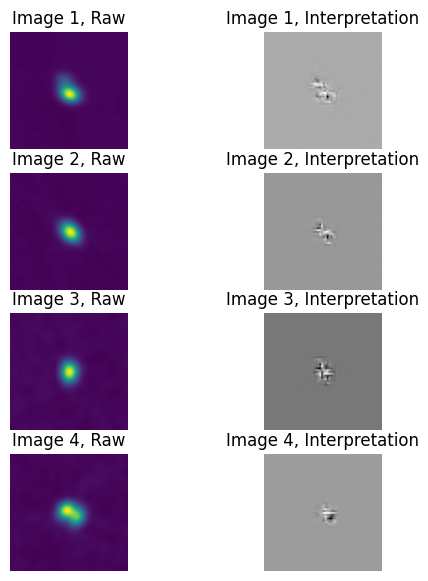

In [34]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 2, figsize=(6, 7))

for i in range(4):
    axes[i][0].imshow(batch[0][i].T.numpy())
    axes[i][0].set_title(f'Image {i+1}, Raw')
    axes[i][0].grid(False)
    axes[i][0].axis('off')
    
    axes[i][1].imshow(min_max_normalize(attr[i]).T.numpy(), cmap='gray')
    axes[i][1].set_title(f'Image {i+1}, Interpretation')
    axes[i][1].grid(False)
    axes[i][1].axis('off')

plt.show()

In [36]:
attention_maps = []

def hook_fn(module, input, output):
    # output[1] is the attention weights (query x key)
    attention_maps.append(output[1].detach().cpu())

# Register hook on all attention layers
for blk in model.backbone.blocks:
    blk.attn.register_forward_hook(hook_fn)

In [37]:
with torch.no_grad():
    outputs = model(batch[0])
    predicted_labels = torch.argmax(outputs, dim=1)

In [ ]:
print(len(attention_maps))          # Number of transformer blocks

# e.g., torch.Size([12, 65, 192]) for 12 heads, 
# 65 patches in a 8x8 patch grid + 1 CLS
# 192 features per patch
print(attention_maps[0].shape)      

12
torch.Size([65, 192])


In [51]:
# cls_attn = attention_maps[-1][:, 0, 1:]  # Last layer, all heads, CLS to all patches
# cls_attn = cls_attn.mean(0).reshape(12, 12)  # Mean over heads

In [44]:
import timm
from timm.utils import AttentionExtract
timm.layers.set_fused_attn(False)

In [49]:
ee = AttentionExtract(model.backbone, names=['*attn*'], method='fx')(batch[0])